# Q-Learning - Frozen Lake

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from matplotlib import pyplot as plot
import numpy as np
import copy

Create game environment for frozen lake.

In [85]:
env = gym.make("FrozenLake-v1", map_name="4x4", render_mode="ansi", is_slippery=True)


Render the environment:

In [121]:
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



Get states and actions for the lake.

In [122]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print(action_space_size,state_space_size)

4 16


Move the agent: 

In [123]:
state = env.reset()
action = env.action_space.sample()
new_state, reward, done, truncated, info = env.step(action)
clear_output(wait=True)
print(env.render())

  (Down)
SFFF
FHFH
FFFH
HFFG



# Complete the code

Initialize some parameters.

In [124]:
num_episodes = 2000
max_steps_per_episode = 100

learning_rate = 0.2 #empezamos con 0.2
discount_rate = 0.95

rewards_avg = []

q_table = [[0] * 4 for _ in range(8*8)] #para cada cuadro de 8x8 tenemos 4 acciones


Run Q-Learning algorithm:

In [129]:
# This cycle is to calculate the average reward/episodes and its only purpose is to plot the nice graph below that
# shows how the agent learn how to maximize the reward.

rewards_avg = []
for it in range(100):
    print('average ', it)
    rewards_all_episodes=[]
    
    # exporation-exploitation trade-off params
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.01 #cambiar con el numero de episodios
    
    q_table = [[0] * 4 for _ in range(8*8)] 

    # iterate over the episodes
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False
        rewards_current_episode = 0

        q_table_copy = copy.deepcopy(q_table)
        
        # iterate over the steps for an episode
        for step in range(max_steps_per_episode):
            # Exploration-exploitation trade-off
            exploration_rate_threshold = np.random.uniform(0,1)
            if exploration_rate_threshold <= exploration_rate:
                action = env.action_space.sample() #random entre arriba abajo izquierda derecha
            else:
                action = np.argmax(q_table_copy[state]) #max
            # Take action
            new_state, reward, done, truncated, info = env.step(action)
            if done == True and reward ==0:
                reward -= 1

            # Update Q-table for Q(s,a)
            q_table[state][action] = (1-learning_rate)*q_table_copy[state][action]+learning_rate*(reward +discount_rate*max(q_table_copy[new_state])) 
            
            # transition next state
            state = new_state
            rewards_current_episode += reward

            if done == True: 
                break

        # Exploration rate decay
        exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

        rewards_all_episodes.append(rewards_current_episode)
    rewards_avg.append(rewards_all_episodes)

average  0
average  1
average  2
average  3
average  4
average  5
average  6
average  7
average  8
average  9
average  10
average  11
average  12
average  13
average  14
average  15
average  16
average  17
average  18
average  19
average  20
average  21
average  22
average  23
average  24
average  25
average  26
average  27
average  28
average  29
average  30
average  31
average  32
average  33
average  34
average  35
average  36
average  37
average  38
average  39
average  40
average  41
average  42
average  43
average  44
average  45
average  46
average  47
average  48
average  49
average  50
average  51
average  52
average  53
average  54
average  55
average  56
average  57
average  58
average  59
average  60
average  61
average  62
average  63
average  64
average  65
average  66
average  67
average  68
average  69
average  70
average  71
average  72
average  73
average  74
average  75
average  76
average  77
average  78
average  79
average  80
average  81
average  82
average  83
av

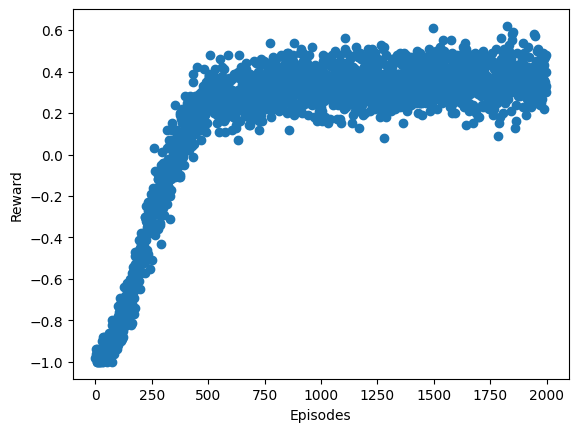

In [130]:

x = [i for i in range(0,num_episodes)]
y = np.mean(rewards_avg, axis=0)
plot.xlabel('Episodes')
plot.ylabel('Reward')
plot.plot(x, y,'o')


In [97]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.5454519087727628, 0.40759088031724455, 0.39874339443220985, 0.40196087303614175], [0.14947704980241017, 0.09591800870011624, 0.07668098851396585, 0.38604125047208565], [0.02655399770856355, 0.3348569665772103, 0.042827015635141324, 0.08449350176295906], [0.06066942768939332, 0.0572679737565822, 0.027499217118333277, 0.22530863187479352], [0.600840025550264, 0.32148935863059797, 0.35104670580748043, 0.3071706597497367], [0, 0, 0, 0], [0.27256354984058695, 0.006752175832658924, 0.02904035279445873, 0.005957196629968477], [0, 0, 0, 0], [0.3678279009455409, 0.4423773419449167, 0.39027155122004187, 0.6587975986679289], [0.3983708749358676, 0.6985448802588987, 0.28083501322363663, 0.32067834964174907], [0.6020541092047016, 0.3297251090603943, 0.11014556183167726, 0.15217175371594466], [0, 0, 0, 0], [0, 0, 0, 0], [0.43203946169788143, 0.32625884749545037, 0.8048361855425603, 0.40193515441809285], [0.6836553935611952, 0.9711904239616549, 0.6138754789187714, 0.774

watch it play!

In [102]:
for episode in range(3):
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state])        
        new_state, reward, done, truncated, info = env.step(action)
        
        print(env.render())
        if done:
            clear_output(wait=True)
            
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break
            
        state = new_state
        env.close()

****You reached the goal!****


# Answer these questions

Answer the following questions running the necessary experiments if necessary:
- What the env.step(action) does? 
- How is the agent rewarded? why?
- What is the q_table matrix for? 
- What is an optimal policy for this specific place? (needs experiments)
- What happen if we modify the exploration_decay_rate parameter? what does it do? (needs experiments)
- What is the discount_rate and learning_rate for? what happen if we modify those? (needs experiments)
- What happen if we remove the first cycle in the code: for it in range(100)? what is their purpose? 
- What is the is_slippery property does? What if we remove the slippery property (is_slippery=False) in the environment? Do we still need RL to solve this problem? why?
- Can you explain in your own words what the last block of code does?

What the env.step(action) does? 

Esto realiza una accion de los estados que tenemos, puede ser izquierda, arriba, abajo y derecha. Luego nos muestra el estado:
new_state, reward, done, truncated, info siendo new_state el proximo estado, reward si logro llegar a la meta, done si termino llegando a la meta o cayendo a un hoyo. Truncated para que funcione como los iniciamos.

How is the agent rewarded? why?

Cuando llega a la meta consigue 1 punto al terminar, si cae a un hoyo aumenté para que su reward baje, esto sucede en cada episodio donde podremos calcular el reward que consigue cada intento.

What is the q_table matrix for? 

para revisar todas las posiciones de la matriz que estamos creando, esta puede ser de 4x4 o de 8x8 tendriamos que crear una matriz de 16 o de 64 espacios para cada lugar que se pueda encontrar el jugador y las posiciones que podria conseguir, de aqui conseguimos el mejor valor en una posicion que nos acerque a la meta.

What is an optimal policy for this specific place? (needs experiments)

la q_table que tenemos en nuestro experimento en la parte de arriba es la mejor qtable que se logró analizar. En un cuadro 4x4 lo que hace es bajar 2 cuadros, moverse a la derecha 2 cuadros, baja 1 y otra vez a la derecha 1 cuadro, se dio cuenta que ir a la izquierda o arriba no nos da resultados eficaces y no son las mejores acciones para este ejercicio.

What happen if we modify the exploration_decay_rate parameter? what does it do? (needs experiments)

Esto va a cambiar la cantidad de veces que entra a explorar en vez de explotar, esto deberia ser distinto dependiendo de la cantidad de episodios que tengamos porque mientras mas avancemos porcentualmente en nuestros episodios mas deberia ser la cantidad de explotaciones que haya y menos la cantidad de exploracion que se haga.

What is the discount_rate and learning_rate for? what happen if we modify those? (needs experiments)

Discount rate determina si el agente se enfoca mas en rewards inmediatos o futuros, si el discount rate tiende a 1 hara jugadas que sean mejor que solamente la jugada siguiente. El learning rate nos da en que medida cambia nuestra Q table mientras vamos avanzando el entrenamiento. Mientras mayor el learning rate mayor sera la proporcion que los nuevos valores se mezclan con valores existentes en nuestra qtable.

What happen if we remove the first cycle in the code: for it in range(100)? what is their purpose? 

Solo se entrenara una vez, por lo que no tendremos un average del entrenamiento de los episodios para conseguir un resultado mas exacto del que estariamos sacando haciendo correr los episodios una vez.

What is the is_slippery property does? What if we remove the slippery property (is_slippery=False) in the environment? Do we still need RL to solve this problem? why?

Sin is_slippery en este ejercicio al entrar a un hueco no nos resbalariamos y por ende seria como un ejercicio BFS donde se busca la mejor manera de llegar de un lado a otro sin tomar en cuenta que hay lugares que estadisticamente serian perjudiciales, en este caso no necesitariamos RL para resolverlo ya que tenemos otros agentes como BFS que hacen lo mismo que lo que haria un RL.

Can you explain in your own words what the last block of code does?

tenemos nuestro env entrenado y lo que hacemos es hacerlo jugar eligiendo un env.step que consigue de su q_table despues del entrenamiento, por lo que si esta bien entrenado lograra llegar a la meta y tendremos el mensaje you reached the goal, sino tenemos 2 opciones, sino llega en 100 movidas solamente entra al siguiente episodio y sino termina con you fell through a hole si caemos en un hoyo.